In [3]:
import utils.Evaluation as ev
import utils.CustomModel as cm
import utils.Encryption as en
import utils.utils as ut
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import json

In [1]:
root_dir = "F:/pps_paper/dataset"

In [16]:
noises = [0,5,20,40,60,80,100]
metrics = ['Jaccard Index','val_Jaccard Index','loss','val_loss']

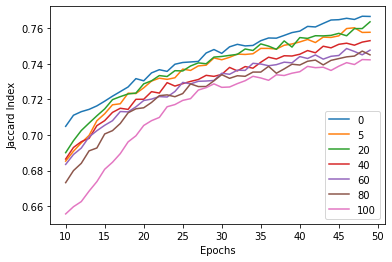

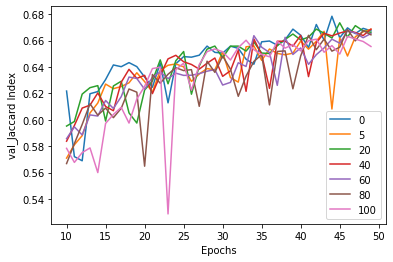

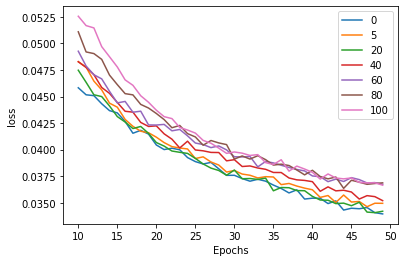

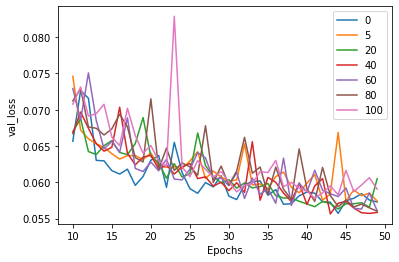

In [51]:
for c , metric in enumerate(metrics):
    plt.figure()
    for r , noise in enumerate(noises):
        df = pd.read_csv(f'{root_dir}/results/training_{noise}.csv')
        plt.plot(df['epoch'][10:],df[metric][10:])
    plt.legend(noises)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.show()